In [1]:
import pandas as pd
import numpy as np

import pickle

from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

from matplotlib import pyplot as plt

import seaborn as sns

## Helper Functions

In [2]:
def speech_count(president, speeches):
    """ Returns the number of speeches given by a given president """
    return len(speeches[speeches.President == president])

In [3]:
def combine_texts(president, speeches):
    """
        Combines the texts of all transcripts for a given president
    """
    speeches = speeches[speeches.President == president]
    
    texts = ""
    for row in speeches.itertuples(index=False):
        texts += row[5] + " "
    return texts

In [4]:
def build_corpus(speeches, presidents):
    """
        Builds a corpus given a speeches dataframe and list of of all presidents
    """
    
    # Dictionary for president transcripts
    transcript_dict = {}
    
    # Map all combined transcripts to the respective presidents
    for president in set(speeches.President.values):
         transcript_dict[president] = [combine_texts(president, speeches)]

    # Build corpus -- collection of texts
    corpus = pd.DataFrame.from_dict(transcript_dict).T.rename(columns={0: "transcripts"})
    
    # Add party affiliation
    party_affiliation = []
    for president in corpus.index:
        party_affiliation.append(speeches[speeches.President == president].Party.values[0])
        
    # Filter columns to include only party and transcripts
    corpus['Party'] = party_affiliation
    corpus = corpus[['Party', 'transcripts']]
    
    # Reorder presidents
    president_order = []
    corpus_presidents = corpus.index
    for president in presidents:
        if president in corpus_presidents:
            president_order.append(president)
    corpus = corpus.reindex(index = president_order)
    
    return corpus

## Prepare Corpus and DTM


In [5]:
# Load speeches
speeches = pickle.load(open("pickles/speeches.p", "rb" ))

# Get all presidents
presidents = [
                'George Washington',
                'John Adams',
                'Thomas Jefferson',
                'James Madison',
                'James Monroe',
                'John Quincy Adams',
                'Andrew Jackson',
                'Martin Van Buren',
                'William Harrison',
                'John Tyler',
                'James K. Polk',
                'Zachary Taylor',
                'Millard Fillmore',
                'Franklin Pierce',
                'James Buchanan',
                'Abraham Lincoln',
                'Andrew Johnson',
                'Ulysses S. Grant',
                'Rutherford B. Hayes',
                'James A. Garfield',
                'Chester A. Arthur',
                'Grover Cleveland',
                'Benjamin Harrison',
                'William McKinley',
                'Franklin D. Roosevelt',
                'William Taft',
                'Woodrow Wilson',
                'Warren G. Harding',
                'Calvin Coolidge',
                'Herbert Hoover',
                'Theodore Roosevelt',
                'Harry S. Truman',
                'Dwight D. Eisenhower',
                'John F. Kennedy',
                'Lyndon B. Johnson',
                'Richard M. Nixon',
                'Gerald Ford',
                'Jimmy Carter',
                'Ronald Reagan',
                'George H. W. Bush',
                'Bill Clinton',
                'George W. Bush',
                'Barack Obama',
                'Donald Trump'
]

In [6]:
# Build corpus
corpus = build_corpus(speeches, presidents)

In [7]:
# Document-term matrix using CountVectorizer excluding common English stop words
cv = CountVectorizer(stop_words='english')
transcript_cv = cv.fit_transform(corpus['transcripts'])
transcript_dtm = pd.DataFrame(transcript_cv.toarray(), columns=cv.get_feature_names())
transcript_dtm.index = corpus.index
transcript_tdm = transcript_dtm.T
transcript_tdm

,George Washington,John Adams,Thomas Jefferson,James Madison,James Monroe,John Quincy Adams,Andrew Jackson,Martin Van Buren,William Harrison,John Tyler,...,Lyndon B. Johnson,Richard M. Nixon,Gerald Ford,Jimmy Carter,Ronald Reagan,George H. W. Bush,Bill Clinton,George W. Bush,Barack Obama,Donald Trump
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
000,4,0,15,45,19,200,140,56,0,160,...,125,53,25,54,100,40,119,72,95,72
0000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000k,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zooming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
zoot,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
zte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
zuckert,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Top 30 words for each president
top_dict = {}
for word in transcript_tdm.columns:
    top = transcript_tdm[word].sort_values(ascending=False).head(100)
    top_dict[word]= list(top.index)
    
top_words = pd.DataFrame.from_dict(top_dict)
top_words.index = top_words.index + 1
top_words

,George Washington,John Adams,Thomas Jefferson,James Madison,James Monroe,John Quincy Adams,Andrew Jackson,Martin Van Buren,William Harrison,John Tyler,...,Lyndon B. Johnson,Richard M. Nixon,Gerald Ford,Jimmy Carter,Ronald Reagan,George H. W. Bush,Bill Clinton,George W. Bush,Barack Obama,Donald Trump
1,states,states,shall,states,states,000,states,government,power,states,...,president,peace,congress,president,people,world,people,america,people,people
2,united,united,public,united,united,states,government,public,people,government,...,people,people,world,people,government,people,america,people,ve,going
3,government,government,country,war,great,united,united,states,government,united,...,think,war,people,mr,world,president,new,world,america,want
4,public,country,states,public,government,congress,public,united,constitution,congress,...,mr,america,america,ve,ve,new,work,iraq,just,great
5,shall,people,citizens,government,congress,year,state,country,citizens,public,...,world,world,new,world,america,america,americans,new,new,country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,principles,future,received,known,countries,colonies,spirit,results,republic,house,...,meet,free,strength,programs,yes,weapons,citizens,leaders,israel,drugs
97,fellow,recommend,relations,result,formed,execution,received,legislation,possessed,point,...,power,soviet,free,come,rates,process,reform,ll,men,okay
98,authority,attention,care,required,debt,freedom,service,measures,harmony,senate,...,home,military,continue,agreement,family,federal,economic,job,past,bad
99,commerce,laid,object,ships,late,acts,vessels,difficulties,veto,just,...,senate,day,forces,weapons,told,spending,schools,qaeda,ago,protect


In [9]:
# Add new stop words if more than 25% of presidents have that word
words = []
for president in presidents:
    words += list(top_words[president].values)

add_stop_words = [word for word, count in Counter(words).most_common() if count > 22]
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [10]:
# Update the document-term matrix with the new list of stop words
cv = CountVectorizer(stop_words=stop_words)
transcript_cv = cv.fit_transform(corpus['transcripts'])
transcript_dtm = pd.DataFrame(transcript_cv.toarray(), columns=cv.get_feature_names())
transcript_dtm.index = corpus.index
transcript_tdm = transcript_dtm.T
transcript_tdm

,George Washington,John Adams,Thomas Jefferson,James Madison,James Monroe,John Quincy Adams,Andrew Jackson,Martin Van Buren,William Harrison,John Tyler,...,Lyndon B. Johnson,Richard M. Nixon,Gerald Ford,Jimmy Carter,Ronald Reagan,George H. W. Bush,Bill Clinton,George W. Bush,Barack Obama,Donald Trump
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
0000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000k,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zooming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
zoot,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
zte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
zuckert,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Number of unique words per president



In [11]:
# Identify the non-zero items in the document-term matrix
unique_list = []
for president in presidents:
    uniques = transcript_tdm[president].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Dataframe with unique word count
df_words = pd.DataFrame(list(zip(presidents, unique_list)), columns=['president', 'unique_words'])
df_words_sort = df_words.sort_values(by='unique_words', ascending=False)
df_words_sort

,president,unique_words
38,Ronald Reagan,10757
30,Theodore Roosevelt,10136
42,Barack Obama,9786
34,Lyndon B. Johnson,9465
21,Grover Cleveland,9350
23,William McKinley,8053
24,Franklin D. Roosevelt,7974
33,John F. Kennedy,7934
40,Bill Clinton,7590
25,William Taft,7579


## Number of speeches per president

In [12]:
# Speech count per president
president_speech_count = []
for president in presidents:
    count = speech_count(president, speeches)
    president_speech_count.append(count)
    
# Dataframe with speech count
df_speech_count = pd.DataFrame(list(zip(presidents, president_speech_count)), columns=['president', 'speeches'])
df_speech_count_sort = df_speech_count.sort_values(by='speeches', ascending=False)
df_speech_count_sort

,president,speeches
34,Lyndon B. Johnson,71
38,Ronald Reagan,59
42,Barack Obama,50
24,Franklin D. Roosevelt,49
33,John F. Kennedy,44
41,George W. Bush,39
40,Bill Clinton,39
26,Woodrow Wilson,33
17,Ulysses S. Grant,32
16,Andrew Johnson,31


## Average speech length per president

In [13]:
avg_speech_length = []
for president in presidents:
    speech_length = len(corpus.loc[president].transcripts)
    num_speeches = speech_count(president, speeches)
    avg_speech_length.append(round(speech_length/num_speeches, 2))
    
# Dataframe with speech count
df_avg_speech_length = pd.DataFrame(list(zip(presidents, avg_speech_length)), columns=['president', 'avg_speech_length'])
df_avg_speech_length_sort = df_avg_speech_length.sort_values(by='avg_speech_length', ascending=False)
df_avg_speech_length_sort

,president,avg_speech_length
25,William Taft,59163.92
30,Theodore Roosevelt,53040.55
8,William Harrison,49669.00
23,William McKinley,40450.57
15,Abraham Lincoln,39844.40
7,Martin Van Buren,38985.10
28,Calvin Coolidge,37671.42
22,Benjamin Harrison,36356.70
6,Andrew Jackson,35915.85
14,James Buchanan,34685.21


## Graph speech count per year

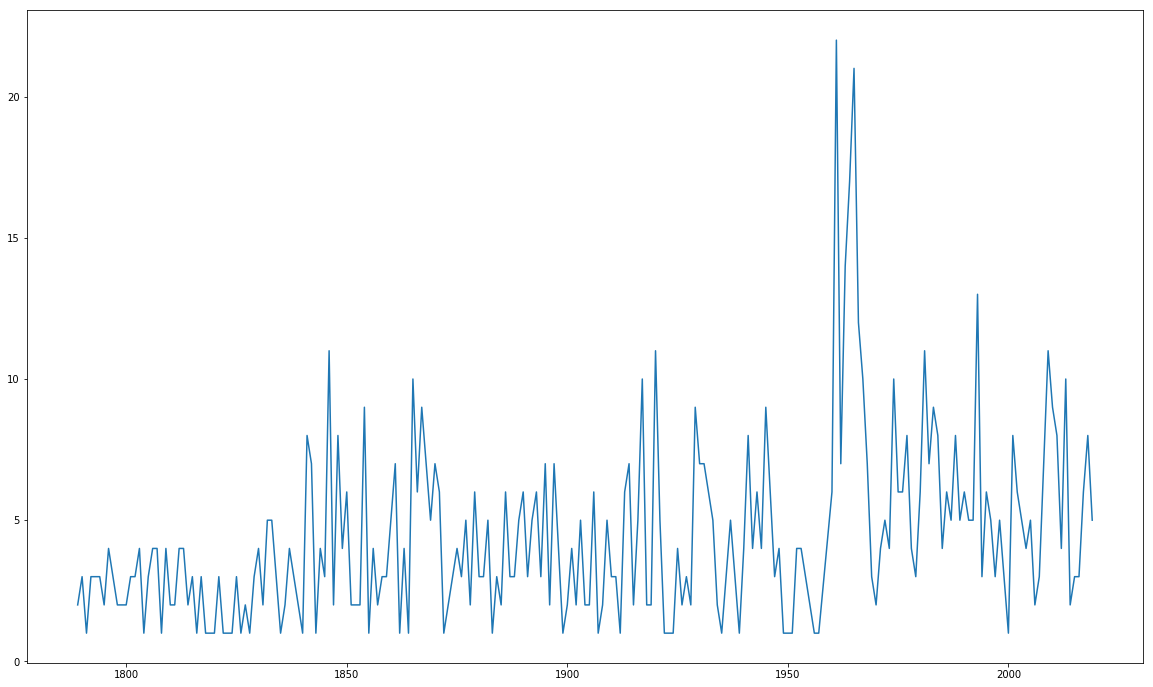

In [14]:
# Lambda function
year = lambda x: x.year

# Prepare data for speeches
counter = Counter()
for year in speeches.Date.apply(year).values:
    counter[year] += 1
years = list(counter.keys())
year_speech_count = [counter[year] for year in years]

# Plot speeches per year
fig, ax = plt.subplots(figsize=(20,12))
sns.lineplot(x=years, y=year_speech_count)

In [15]:
# Years with most speeches
speeches_per_year = list(zip(years, year_speech_count))
sorted(speeches_per_year, key=lambda tup: tup[1], reverse=True)[:10]

[(1961, 22),
 (1965, 21),
 (1964, 17),
 (1963, 14),
 (1993, 13),
 (1966, 12),
 (1846, 11),
 (1920, 11),
 (1981, 11),
 (2009, 11)]

 ## Political Eras

In [16]:
# First Party System (1792–1824)
first_party_system_speeches = speeches[speeches['Date'] <= '1824-12-07']

# Second Party System (1828–1854)
second_party_system_mask = (speeches['Date'] > '1824-12-07') & (speeches['Date'] <= '1852-12-06')
second_party_system_speeches = speeches.loc[second_party_system_mask]

# Third Party System (1854–1895)
third_party_system_mask = (speeches['Date'] > '1852-12-06') & (speeches['Date'] <= '1897-03-02')
third_party_system_speeches = speeches.loc[third_party_system_mask]

# Fourth Party System (1896–1932)
fourth_party_system_mask = (speeches['Date'] > '1897-03-02') & (speeches['Date'] <= '1932-12-06')
fourth_party_system_speeches = speeches.loc[fourth_party_system_mask]

# Fifth Party System (1932–1964)
fifth_party_system_mask = (speeches['Date'] > '1932-12-06') & (speeches['Date'] <= '1963-10-26')
fifth_party_system_speeches = speeches.loc[fifth_party_system_mask]

# Sixth Party System (1964–present)
six_party_system_mask = (speeches['Date'] > '1963-10-26')
six_party_system_speeches = speeches.loc[six_party_system_mask]

In [17]:
# Build Party System Speeches
first_party_corpus = build_corpus(first_party_system_speeches, presidents)
second_party_corpus = build_corpus(second_party_system_speeches, presidents)
third_party_corpus = build_corpus(third_party_system_speeches, presidents)
fourth_party_corpus = build_corpus(fourth_party_system_speeches, presidents)
fifth_party_corpus = build_corpus(fifth_party_system_speeches, presidents)
sixth_party_corpus = build_corpus(six_party_system_speeches, presidents)

In [18]:
# Pickle corpus and document term matrix
pickle.dump(corpus, open("pickles/corpus.p", "wb" ))
pickle.dump(transcript_tdm, open("pickles/term_doc_matrix.p", "wb" ))
pickle.dump(cv, open("pickles/cv_stop.p", "wb" ))

# Pickle stop_words
pickle.dump(stop_words, open("pickles/stop_words.p", "wb" ))

# Pickle political era corpuses
pickle.dump(first_party_corpus, open("pickles/first_party_corpus.p", "wb" ))
pickle.dump(second_party_corpus, open("pickles/second_party_corpus.p", "wb" ))
pickle.dump(third_party_corpus, open("pickles/third_party_corpus.p", "wb" ))
pickle.dump(fourth_party_corpus, open("pickles/fourth_party_corpus.p", "wb" ))
pickle.dump(fifth_party_corpus, open("pickles/fifth_party_corpus.p", "wb" ))
pickle.dump(sixth_party_corpus, open("pickles/sixth_party_corpus.p", "wb" ))